In [2]:
pip install pandas-datareader

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [43]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor





In [4]:
stk_tickers =["MSFT","IBM","GOOGL"]
ccy_tickers = ["DEXJPUS","DEXUSUK"]
idx_tickers = ["SP500","DJIA","VIXCLS"]

In [5]:
stk_data = web.DataReader(stk_tickers,"yahoo")
ccy_data = web.DataReader(ccy_tickers,"fred")
idx_data = web.DataReader(idx_tickers,"fred")

In [6]:
stk_data

Attributes   Adj Close                                Close              \
Symbols           MSFT         IBM        GOOGL        MSFT         IBM   
Date                                                                      
2017-02-27   59.957729  135.802704   849.669983   64.230003  171.510513   
2017-02-28   59.724354  136.120667   844.929993   63.980000  171.912048   
2017-03-01   60.620506  137.733047   856.750000   64.940002  173.948380   
2017-03-02   59.752357  136.658096   849.849976   64.010002  172.590820   
2017-03-03   59.976406  136.294754   849.080017   64.250000  172.131927   
...                ...         ...          ...         ...         ...   
2022-02-17  290.730011  124.970001  2650.780029  290.730011  124.970001   
2022-02-18  287.929993  124.349998  2608.060059  287.929993  124.349998   
2022-02-22  287.720001  123.919998  2596.270020  287.720001  123.919998   
2022-02-23  280.269989  122.070000  2551.760010  280.269989  122.070000   
2022-02-24  294.589996  121.970001  2653.820068  294.589996  121.970001   

Attributes                     High                                  Low  \
Symbols           GOOGL        MSFT         IBM        GOOGL        MSFT   
Date                                                                       
2017-02-27   849.669983   64.540001  173.279160   850.669983   64.050003   
2017-02-28   844.929993   64.199997  172.686417   848.830017   63.759998   
2017-03-01   856.750000   64.989998  174.521988   858.000000   64.019997   
2017-03-02   849.849976   64.750000  173.881454   856.489990   63.880001   
2017-03-03   849.080017   64.279999  173.346085   850.820007   63.619999   
...                 ...         ...         ...          ...         ...   
2022-02-17  2650.780029  296.799988  128.500000  2742.270020  290.000000   
2022-02-18  2608.060059  293.859985  125.440002  2681.399902  286.309998   
2022-02-22  2596.270020  291.540009  125.000000  2643.610107  284.500000   
2022-02-23  2551.760010  291.700012  124.699997  2641.020020  280.100006   
2022-02-24  2653.820068  295.160004  122.099998  2660.000000  271.519989   

Attributes                                 Open                           \
Symbols            IBM        GOOGL        MSFT         IBM        GOOGL   
Date                                                                       
2017-02-27  171.395798   843.010010   64.540001  173.221802   844.950012   
2017-02-28  171.462708   841.440002   64.080002  171.491394   847.349976   
2017-03-01  172.112808   849.020020   64.129997  172.543015   851.380005   
2017-03-02  172.495224   848.719971   64.690002  173.881454   856.309998   
2017-03-03  171.854691   844.710022   63.990002  172.590820   848.940002   
...                ...          ...         ...         ...          ...   
2022-02-17  124.849998  2649.570068  296.359985  128.050003  2724.860107   
2022-02-18  123.610001  2603.929932  293.049988  124.940002  2669.340088   
2022-02-22  122.680000  2564.469971  285.000000  124.199997  2596.760010   
2022-02-23  121.870003  2550.550049  290.179993  124.379997  2632.969971   
2022-02-24  118.809998  2499.070068  272.510010  120.000000  2499.070068   

Attributes      Volume                        
Symbols           MSFT        IBM      GOOGL  
Date                                          
2017-02-27  15871500.0  3861100.0  1010300.0  
2017-02-28  23239800.0  3423976.0  1383100.0  
2017-03-01  26937500.0  3143858.0  1818700.0  
2017-03-02  24539600.0  3052437.0  1250900.0  
2017-03-03  18135900.0  1905812.0  1005000.0  
...                ...        ...        ...  
2022-02-17  32461600.0  6797000.0  1947500.0  
2022-02-18  34223200.0  4607600.0  2277400.0  
2022-02-22  41736100.0  5349700.0  2249500.0  
2022-02-23  37811200.0  4086400.0  1639300.0  
2022-02-24  56930600.0  6561200.0  2716800.0  

[1259 rows x 18 columns]

In [7]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-02-27,2369.75,20837.44,12.09
2017-02-28,2363.64,20812.24,12.92
2017-03-01,2395.96,21115.55,12.54
2017-03-02,2381.92,21002.97,11.81
2017-03-03,2383.12,21005.71,10.96
...,...,...,...
2022-02-18,4348.87,34079.18,27.75
2022-02-21,NaN,NaN,NaN
2022-02-22,4304.76,33596.61,28.81


In [8]:
(stk_data.loc[:,("Adj Close","MSFT")]).describe()

count    1259.000000
mean      158.458883
std        79.288059
min        59.724354
25%        93.901268
50%       134.085236
75%       213.727417
max       342.402008
Name: (Adj Close, MSFT), dtype: float64

In [9]:
return_period = 5
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).\
shift(-return_period)
Y.name = Y.name[-1]+'_pred'

In [10]:
Y.name=Y.name[-1]+ "_pred"

In [11]:
Y.name

'd_pred'

In [12]:
X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)
X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period,
                                                                             return_period*3,
                                                                             return_period*6,
                                                                             return_period*12]],axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

X = pd.concat([X1,X2,X3,X4], axis=1)
dataset = pd.concat([X,Y],axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:,Y.name]
X = dataset.loc[:,X.columns]

In [13]:
X

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-05-23,-0.010794,0.006139,-0.014230,0.005561,-0.000938,-0.001996,0.006551,-0.010573,-0.003271,0.052666,0.072703
2017-05-31,0.003939,0.016898,-0.011763,-0.002322,0.003077,-0.000179,0.038184,0.016749,0.017236,0.071553,0.088830
2017-06-08,-0.003741,0.016050,-0.010301,0.003484,0.001534,0.001812,0.026934,0.026049,0.064140,0.064682,0.116418
2017-06-15,0.013842,-0.044905,0.005073,-0.013304,-0.000547,0.008339,0.070304,-0.028906,0.016298,0.017516,0.090622
2017-06-22,0.001166,0.016977,0.006306,-0.008574,0.000838,0.001749,-0.039294,0.005137,0.002280,0.019329,0.079080
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-13,-0.004295,0.006076,-0.014967,0.013572,-0.007914,-0.003396,0.035074,-0.029355,-0.089087,-0.079679,-0.009363
2022-01-21,-0.040973,-0.061264,-0.001494,-0.007932,-0.058491,-0.046931,0.407721,-0.029195,-0.136483,-0.123580,-0.044638
2022-01-31,0.036210,0.033820,0.012225,-0.000595,0.023623,0.022084,-0.185806,0.048120,-0.009792,-0.043789,-0.069584
2022-02-07,0.027105,0.028399,-0.001129,0.006970,-0.007040,-0.001160,-0.082664,-0.032784,-0.030273,-0.106261,-0.092742


### Exploratory data analysis


### Desccriptiv Analysis

In [14]:
pd.set_option("precision", 3)

In [15]:
dataset.describe()

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,d_pred
count,2.250e+02,225.000,2.250e+02,2.250e+02,225.000,225.000,225.000,225.000,225.000,225.000,225.000,225.000
mean,3.519e-04,0.004,-8.697e-06,-4.748e-04,0.002,0.001,0.009,0.006,0.018,0.039,0.082,0.006
std,3.758e-02,0.037,8.939e-03,1.220e-02,0.026,0.028,0.177,0.033,0.050,0.064,0.072,0.034
min,-1.683e-01,-0.159,-3.293e-02,-5.492e-02,-0.162,-0.190,-0.559,-0.145,-0.165,-0.288,-0.139,-0.153
25%,-1.718e-02,-0.013,-5.348e-03,-6.905e-03,-0.007,-0.008,-0.087,-0.013,-0.008,0.005,0.044,-0.013
50%,2.102e-03,0.007,4.806e-04,-1.442e-03,0.004,0.004,-0.002,0.008,0.017,0.041,0.085,0.007
75%,1.734e-02,0.023,5.467e-03,6.167e-03,0.015,0.014,0.089,0.024,0.052,0.076,0.130,0.026
max,1.304e-01,0.134,3.800e-02,5.121e-02,0.098,0.121,0.910,0.100,0.186,0.285,0.283,0.100


### 3.2 Data visualization.

In [16]:
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

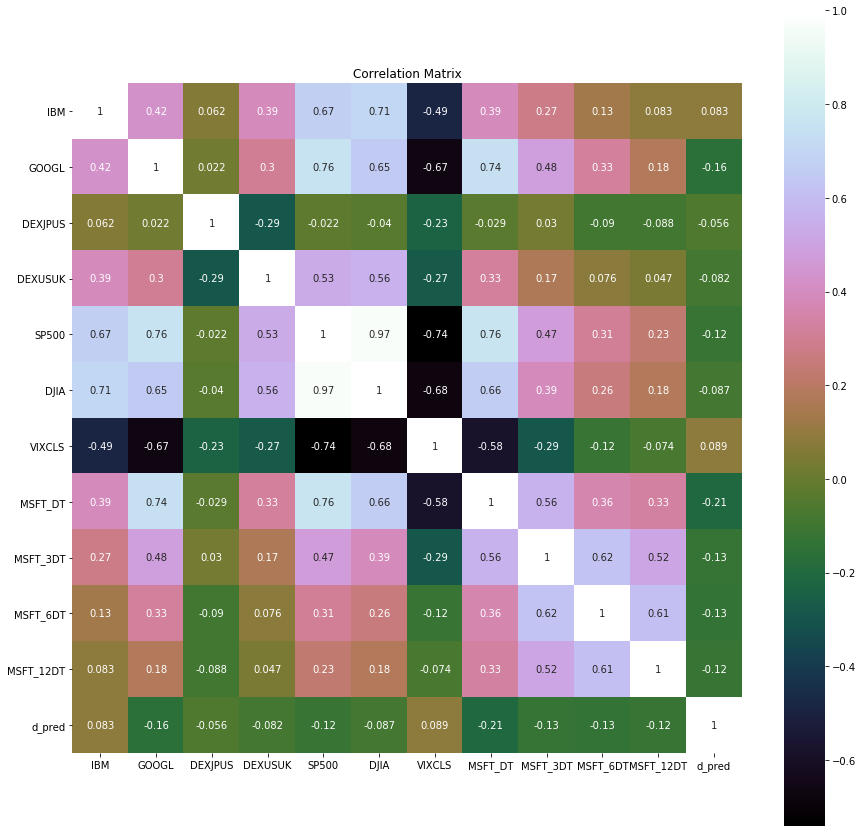

In [17]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

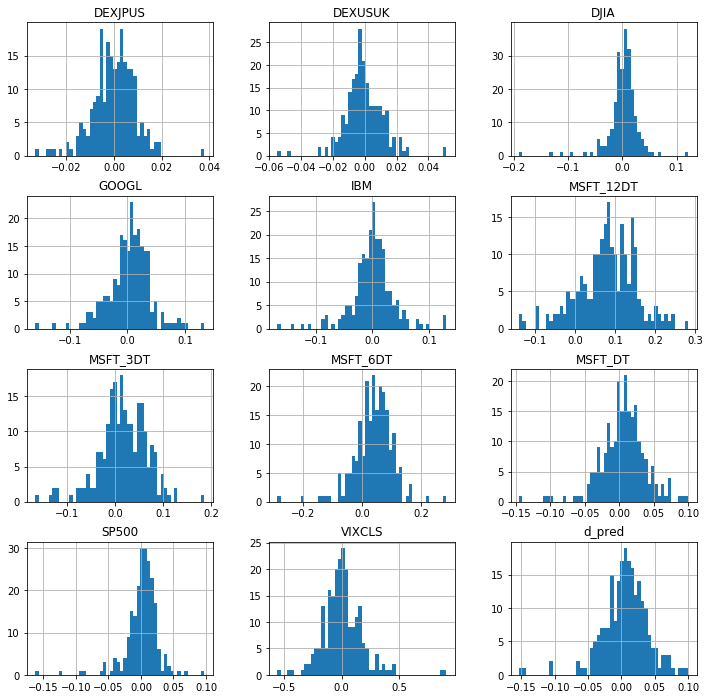

In [18]:
dataset.hist(bins=50,figsize=(12,12));

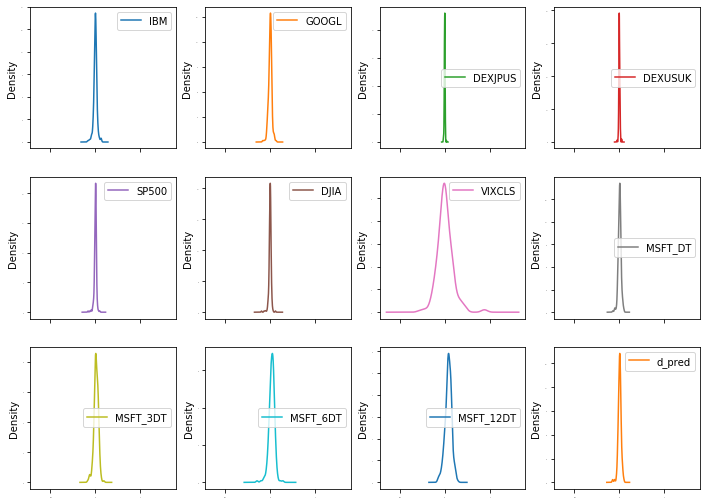

In [19]:
dataset.plot(kind="density",figsize=(12,12),subplots=True,fontsize=1,sharex=True, layout =(4,4));

<Figure size 864x864 with 0 Axes>

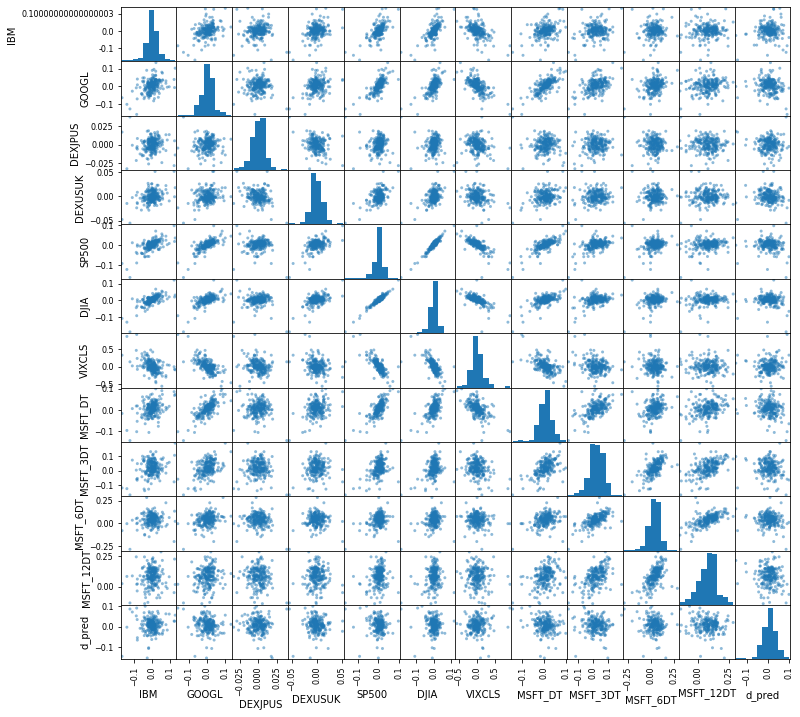

In [20]:
pyplot.figure(figsize=(12,12))
scatter_matrix(dataset,figsize=(12,12));

### 3.3 Time Series Analysis


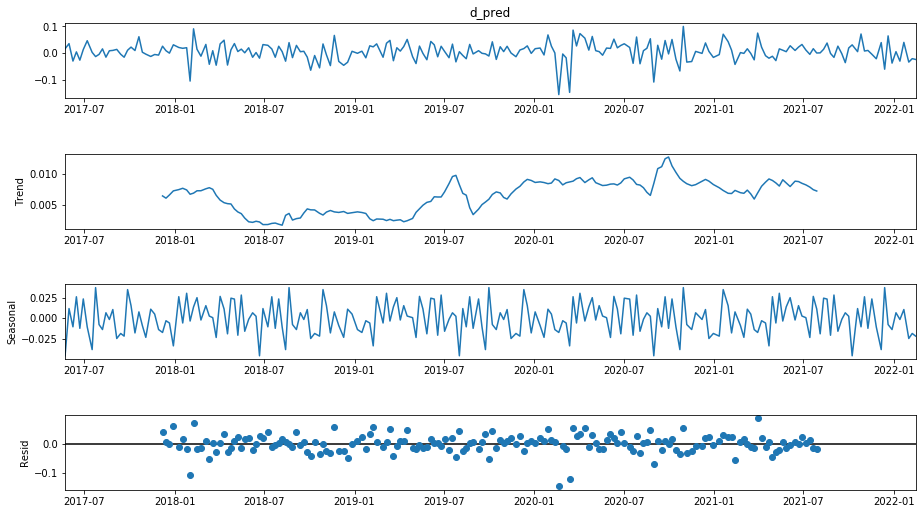

In [21]:
res = sm.tsa.seasonal_decompose(Y,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

### 4.2. Feature Selection


In [22]:
bestfeature = SelectKBest(k=5,score_func=f_regression)
fit = bestfeature.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns =["Specs","Score"]
featureScores.nlargest(10,"Score")

,Specs,Score
7,MSFT_DT,9.973
1,GOOGL,5.652
9,MSFT_6DT,3.899
8,MSFT_3DT,3.612
10,MSFT_12DT,3.229
4,SP500,3.213
6,VIXCLS,1.783
5,DJIA,1.689
0,IBM,1.555
3,DEXUSUK,1.507


5. Evaluate Algorithms and Models



In [30]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train,X_test = X[:train_size],X[train_size:]
Y_train,Y_test = Y[:train_size],Y[train_size:]

### 5.2. Test Options and Evaluation Metrics


In [35]:
num_folds = 10
seed = 7
scoring ="neg_mean_squared_error"

### 5.3. Compare Models and Algorithms

In [51]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RID',Ridge()))
              
models.append(('MLP', MLPRegressor()))

# Boosting methods
              
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
              
# Bagging methods
              
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [59]:
names=[]
kfolds_results = []
for name,model in models:
    names.append(name)
    
    #Kfold analysis:
    kfold = KFold(n_splits=num_folds)
    cv_results = -1 * cross_val_score(model,X_train,Y_train,cv=num_folds,scoring=scoring)
    kfolds_results.append(cv_results)
    
    # To 
    
kfolds_results    

[array([0.00040282, 0.00112996, 0.00060344, 0.00089698, 0.00149226,
        0.00077474, 0.00036241, 0.00416541, 0.00192757, 0.00141896]),
 array([0.0003662 , 0.00139233, 0.00077172, 0.00100113, 0.00089701,
        0.00072008, 0.00026128, 0.00393728, 0.00175283, 0.00151721]),
 array([0.0003662 , 0.00139233, 0.00077172, 0.00100113, 0.00089701,
        0.00072008, 0.00026128, 0.00393728, 0.00175283, 0.00151721]),
 array([0.00028407, 0.00165502, 0.00088441, 0.00149722, 0.00101342,
        0.00092975, 0.00041642, 0.00481016, 0.00185162, 0.00163887]),
 array([0.00124114, 0.00307467, 0.00155037, 0.00164143, 0.00343705,
        0.00189994, 0.00191134, 0.00740706, 0.00313438, 0.00176796]),
 array([0.00165378, 0.00350163, 0.00182867, 0.00169835, 0.00241447,
        0.00210732, 0.00183065, 0.00404197, 0.00367448, 0.00288162]),
 array([0.00034762, 0.00129978, 0.00068388, 0.00101998, 0.00097868,
        0.00068668, 0.00027118, 0.00417569, 0.00174114, 0.00144766]),
 array([0.00168527, 0.00355193, 0.